# TASK 1 : Unemployement Analysis With Python 

CREATOR : Pritesh Gaykar

ORGANIZATION : CipherByte Technologies.Pvt.ltd

BATCH : NOV TO DEC 2023

In [1]:
# Importing the important libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Loading the given dataset

df = pd.read_csv("Unemployment in India.csv")
print(df)

             Region        Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh  31-05-2019   Monthly                             3.65   
1    Andhra Pradesh  30-06-2019   Monthly                             3.05   
2    Andhra Pradesh  31-07-2019   Monthly                             3.75   
3    Andhra Pradesh  31-08-2019   Monthly                             3.32   
4    Andhra Pradesh  30-09-2019   Monthly                             5.17   
..              ...         ...       ...                              ...   
749     West Bengal  29-02-2020   Monthly                             7.55   
750     West Bengal  31-03-2020   Monthly                             6.67   
751     West Bengal  30-04-2020   Monthly                            15.63   
752     West Bengal  31-05-2020   Monthly                            15.22   
753     West Bengal  30-06-2020   Monthly                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%

In [3]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [4]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [15]:
#Renaming Column name in the dataset df 

df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'EUR',df.columns[4]:'EE', df.columns[5]:'ELPR', df.columns[6]:'Region'})
df.head()

,State,Date,Frequency,EUR,EE,ELPR,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [16]:
print(df['EUR'],df['EE'],df['ELPR'])

0       3.65
1       3.05
2       3.75
3       3.32
4       5.17
       ...  
749     7.55
750     6.67
751    15.63
752    15.22
753     9.86
Name: EUR, Length: 754, dtype: float64 0      11999139.0
1      11755881.0
2      12086707.0
3      12285693.0
4      12256762.0
          ...    
749    10871168.0
750    10806105.0
751     9299466.0
752     9240903.0
753     9088931.0
Name: EE, Length: 754, dtype: float64 0      43.24
1      42.05
2      43.50
3      43.97
4      44.68
       ...  
749    44.09
750    43.34
751    41.20
752    40.67
753    37.57
Name: ELPR, Length: 754, dtype: float64


In [6]:
df["State"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [7]:
df["Region"].unique()

array(['Rural', nan, 'Urban'], dtype=object)

In [8]:
df.groupby("Region").size()

Region
Rural    359
Urban    381
dtype: int64

In [9]:
# Computing the mean values of the 'EUR', 'EE', and 'ELPR' columns for each region in the DataFrame df

region_stats = df.groupby(['Region'])[['EUR','EE','ELPR']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

,Region,EUR,EE,ELPR
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


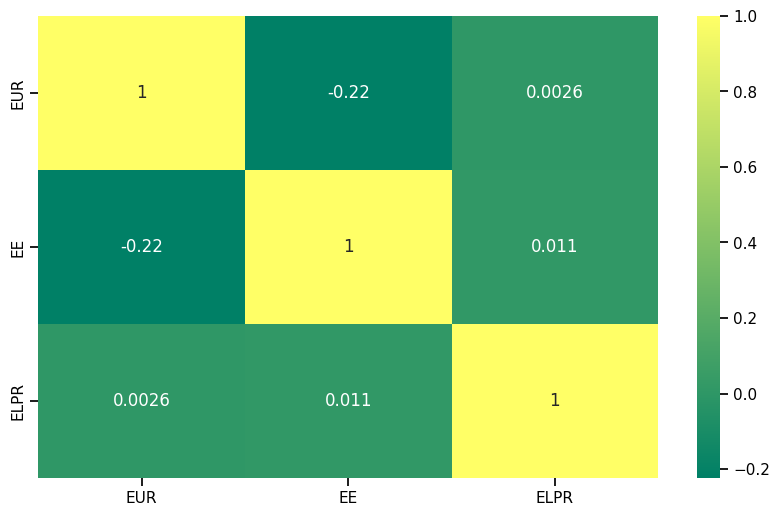

In [11]:
# Generating a heatmap to visualize the correlation matrix between the columns in the Dataframe df

heat_maps = df[['EUR','EE', 'ELPR']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

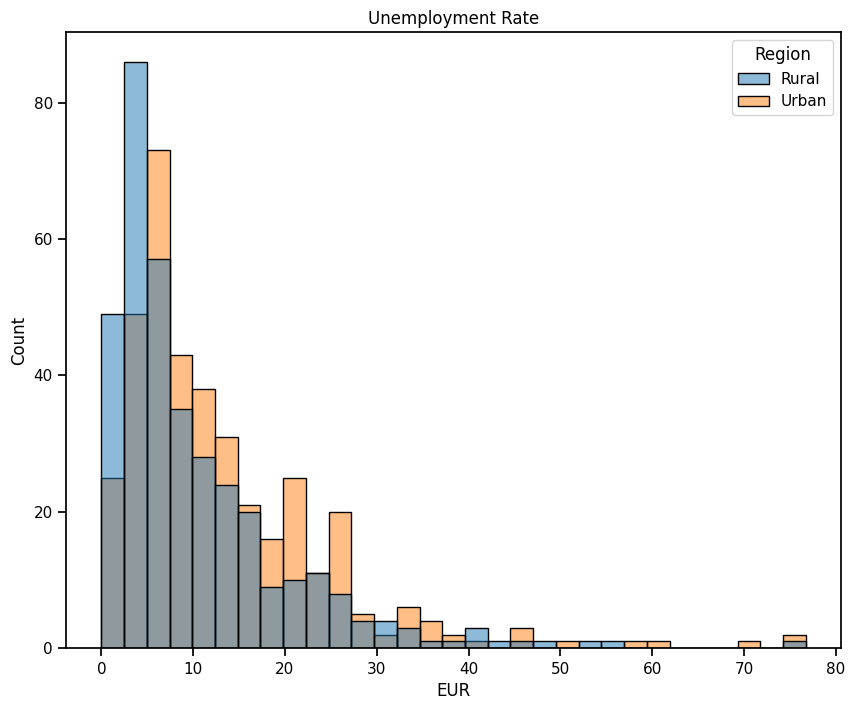

In [12]:
# Unemployment rate according to different regions of India

df.columns= ["State","Date","Frequency","EUR","EE","ELPR","Region"]

plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="Region", data=df)
plt.show()

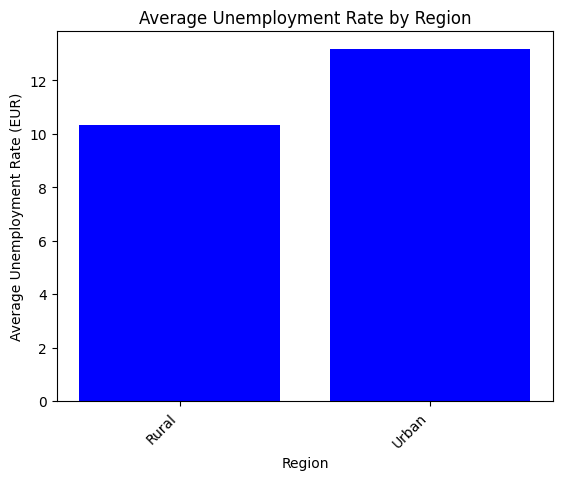

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating a bar plot using pandas for analysing unemployement rate in the region 

region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

plt.bar(region["Region"], region["EUR"], color='blue')
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate (EUR)")
plt.xticks(rotation=45, ha="right")
plt.show()

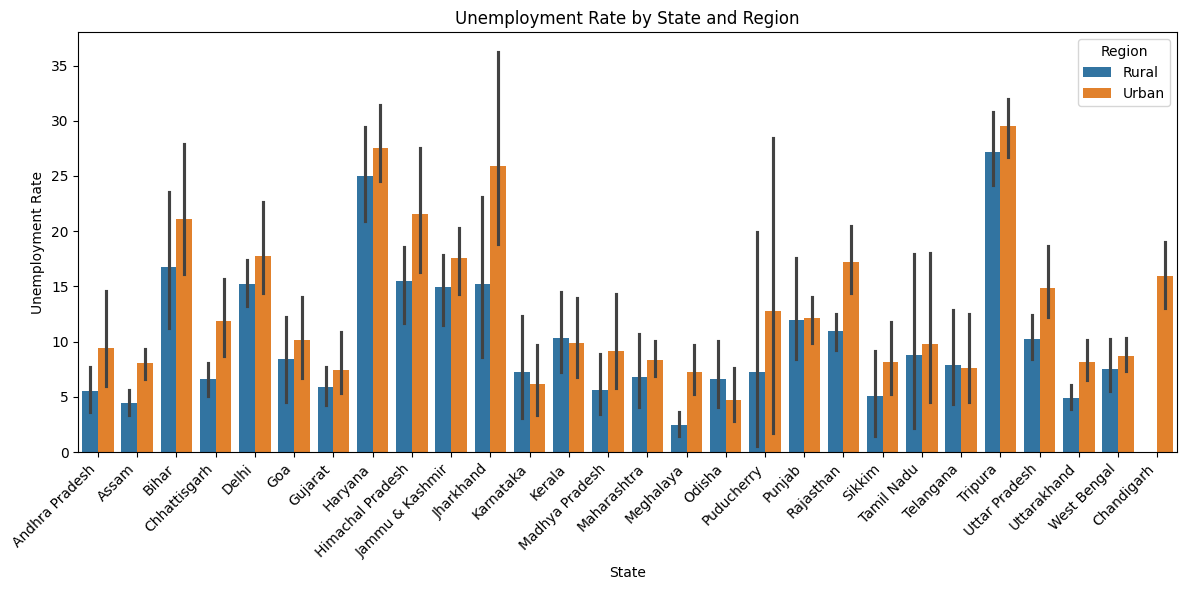

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

unemployment = df[["State", "Region", "EUR"]]

# Creating a bar plot using Seaborn for analysing Unemployement rate in state and region

plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='EUR', hue='Region', data=unemployment)
plt.title('Unemployment Rate by State and Region')
plt.xlabel('State')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()